In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from os import listdir
from io import StringIO
import pickle
import datetime
import math
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing

#First, identify the dates that we want
date1 = datetime.datetime(1996,12,19,18,30,5)
date2 = datetime.datetime(2000,3,7,16,30,5)

#Second, create the lists for those two days where we will store their values
day1=[]
day2=[]

day1=cme_graphing.find_file(date1)
day2=cme_graphing.find_file(date2)

print ("Data table for 1996 data: \n", day1)
print ("Data table for 2000 data: \n", day2)


Data table for 1996 data: 
              DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  1996-12-19 18:30:05    2.76  237.1  C2   1  345.0  194.0
1  1996-12-19 21:55:02    4.87  245.8  C2   1  427.0  174.0
2  1996-12-19 22:18:11    4.92  242.8  C3   1  297.0  246.0
3  1996-12-19 22:30:05    5.36  246.4  C2   1  445.0  168.0
4  1996-12-19 23:45:06    5.90  243.9  C3   1  305.0  243.0
5  1996-12-20 01:15:05    6.62  244.7  C3   1  311.0  241.0
6  1996-12-20 02:45:05    7.60  245.3  C3   1  319.0  238.0
7  1996-12-20 04:18:08    8.78  244.7  C3   1  328.0  233.0
8  1996-12-20 05:45:06    9.76  245.1  C3   1  336.0  230.0
9  1996-12-20 07:21:32   11.20  244.6  C3   1  347.0  224.0
10 1996-12-20 08:45:05   12.23  243.3  C3   1  354.0  218.0
11 1996-12-20 13:25:46   16.43  246.5  C3   1  390.0  209.0
12 1996-12-20 15:22:47   18.09  246.4  C3   1  403.0  203.0
Data table for 2000 data: 
              DATE_TIME  HEIGHT  ANGLE TEL  FC    COL    ROW
0  2000-03-07 16:30:05    3.72  113.3  C2   

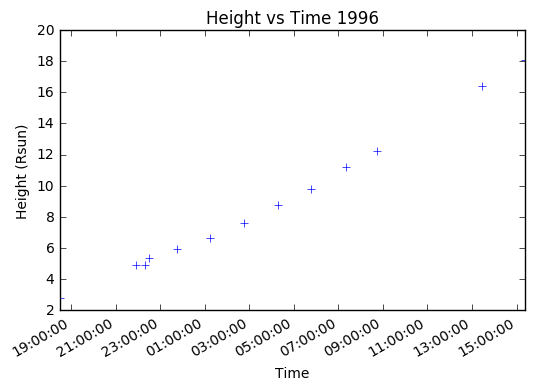

In [2]:
cme_graphing.height_vs_time(day1)

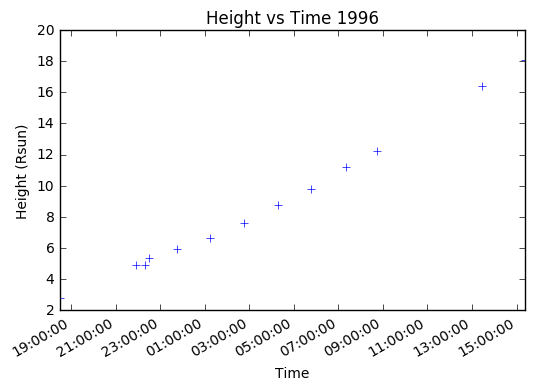

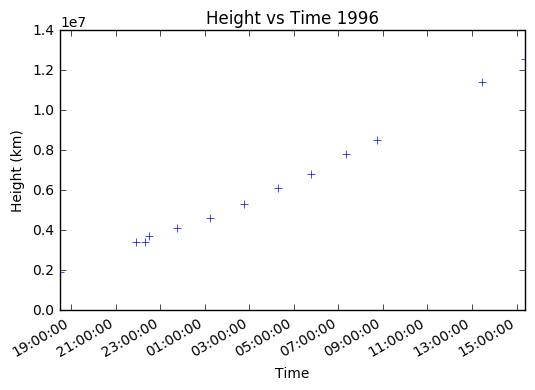

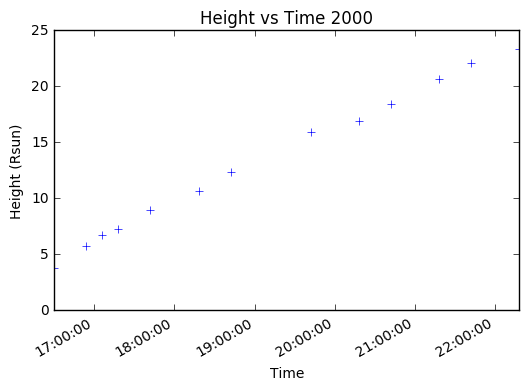

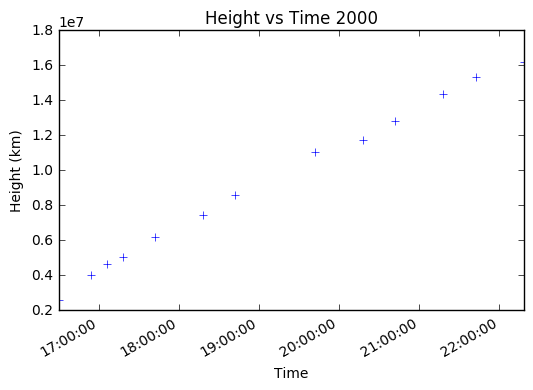

In [3]:
#Fourth, plot the height vs time
#create time array
t1_min=time_data1-time_data1[0]
t1_min=(np.array(t1_min, dtype=datetime.datetime))*(10**-9)/60

#convert height to km
height_data1_km=np.array(height_data1)
height_data1_km=height_data1_km*695000

plt.title("Height vs Time 1996")
plt.xlabel('Time')
plt.ylabel('Height (Rsun)')
plt.plot(time_data1, height_data1,'+')
plt.gcf().autofmt_xdate()
plt.show()

plt.title("Height vs Time 1996")
plt.xlabel('Time')
plt.ylabel('Height (km)')
plt.plot(time_data1, height_data1_km,'+')
plt.gcf().autofmt_xdate()
plt.show()

#plotting height vs time for 2000
height_data2=day2['HEIGHT']
time_data2=day2['DATE_TIME']
diff_time_data2=np.diff(time_data2)

#create time array
t2_min=[]
x=0
while (x<len(time_data2)):
    r=time_data2[x]-time_data2[0]
    s=divmod(r.days * 86400 + r.seconds,60)
    s=int(round((s[0]+s[1]/60.0)))
    t2_min.append(s)
    x+=1

#convert height to km
height_data2_km=np.array(height_data2)
height_data2_km=height_data2_km*695000

plt.title("Height vs Time 2000")
plt.xlabel('Time')
plt.ylabel('Height (Rsun)')
plt.plot(time_data2, height_data2,'+')
plt.gcf().autofmt_xdate()
plt.show()

plt.title("Height vs Time 2000")
plt.xlabel('Time')
plt.ylabel('Height (km)')
plt.plot(time_data2, height_data2_km,'+')
plt.gcf().autofmt_xdate()
plt.show()

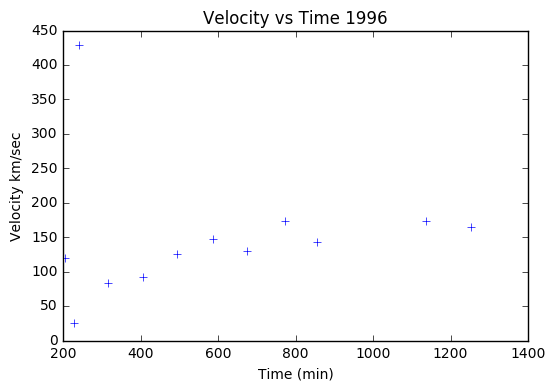

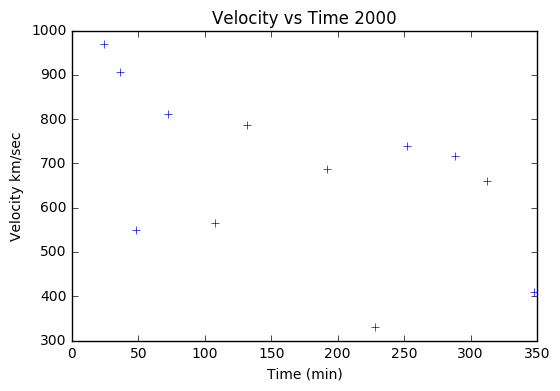

In [4]:
#Fifth, plot Velocity vs Time
#1996
diff_height_data1=np.diff(height_data1_km)
velocity1=diff_height_data1/((diff_time_data1.astype(float))*10**-9)

plt.title("Velocity vs Time 1996")
plt.xlabel('Time (min)')
plt.ylabel('Velocity km/sec')
plt.plot(t1_min[1:].astype(float), velocity1,'+') #one less data point
plt.show()

#2000
diff_height_data2=np.diff(height_data2_km)
velocity2=diff_height_data2/((diff_time_data2.astype(float))*10**-9)

plt.title("Velocity vs Time 2000")
plt.xlabel('Time (min)')
plt.ylabel('Velocity km/sec')
plt.plot(t2_min[1:], velocity2,'+') #one less data point
plt.show()